# Árvores de Decisão


### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import warnings
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from graphviz import Source
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from tabulate import tabulate

## Modelo de Classificação

Carregamento do dataset Iris

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target
# Iris Setosa, Versicolor e Virginica

In [3]:
df_iris = iris.data[["petal length (cm)", "petal width (cm)"]].copy()
df_iris["target"] = iris.target
print(tabulate(df_iris.head(), headers='keys', tablefmt='grid'))
print(tabulate(df_iris.tail(), headers='keys', tablefmt='grid'))

+----+---------------------+--------------------+----------+
|    |   petal length (cm) |   petal width (cm) |   target |
+====+=====================+====================+==========+
|  0 |                 1.4 |                0.2 |        0 |
+----+---------------------+--------------------+----------+
|  1 |                 1.4 |                0.2 |        0 |
+----+---------------------+--------------------+----------+
|  2 |                 1.3 |                0.2 |        0 |
+----+---------------------+--------------------+----------+
|  3 |                 1.5 |                0.2 |        0 |
+----+---------------------+--------------------+----------+
|  4 |                 1.4 |                0.2 |        0 |
+----+---------------------+--------------------+----------+
+-----+---------------------+--------------------+----------+
|     |   petal length (cm) |   petal width (cm) |   target |
+=====+=====================+====================+==========+
| 145 |              

Treinamento de árvore de decisão para classificação e impressão da árvore resultante utilizando duas features (petal length e petal width)

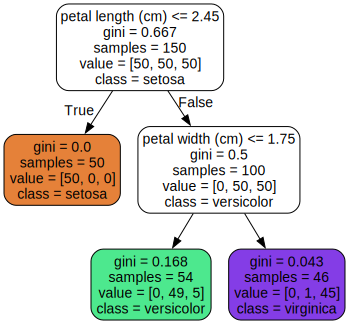

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)
export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=["petal length (cm)", "petal width (cm)"], class_names=iris.target_names, rounded=True, filled=True)
Source.from_file("iris_tree.dot")

Gera a probabilidade de classificação de um caso (flor) novo usando a árvore de decisão

In [ ]:
# Petal Length = 5
# Petal Width = 1.5
print(tree_clf.predict_proba([[5, 1.5]]).round(3))
print(tree_clf.predict([[5, 1.5]]))
# Iris Setosa = [0]
# Iris Versicolor = [1]
# Iris Virginica = [2]

In [ ]:
# Petal Length = 4
# Petal Width = 3.8
print(tree_clf.predict_proba([[4, 3.8]]).round(3))
print(tree_clf.predict([[4, 3.8]]))
# Iris Setosa = [0]
# Iris Versicolor = [1]
# Iris Virginica = [2]

## Análise e Avaliação de Métricas das Árvores de Decisão

Geração de um conjunto de dados sintético em formato de meia-lua

In [ ]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)
# Rótulos: Classe 0 e Classe 1

In [ ]:
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
print(tabulate(df_moons.head(), headers='keys', tablefmt='grid'))
print(tabulate(df_moons.tail(), headers='keys', tablefmt='grid'))

Criação e treinamento de duas árvores de decisão, tendo a segunda o parâmetro (min_samples_leaf = 25) => Mínimo 25 amostras por folha

In [ ]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf1.fit(X_moons, y_moons)

tree_clf2 = DecisionTreeClassifier(min_samples_leaf=25, random_state=42)
tree_clf2.fit(X_moons, y_moons)

Impressão da primeira árvore de decisão

In [ ]:
plt.figure(figsize=(8, 7))
plot_tree(tree_clf1, filled=True, rounded=True, class_names=["Class 0", "Class 1"])
plt.show()

Impressão da segunda árvore de decisão

In [ ]:
plt.figure(figsize=(4, 5))
plot_tree(tree_clf2, filled=True, rounded=True, class_names=["Class 0", "Class 1"])
plt.show()

*Mede a acurácia dos modelos tree_clf1 e tree_clf2 no conjunto de treinamento (as 150 amostras originais). Isso mostra o quão bem o modelo conseguiu aprender os padrões no mesmo conjunto usado para treiná-lo.*

In [ ]:
tree_clf1.score(X_moons, y_moons)

In [ ]:
tree_clf2.score(X_moons, y_moons)

*Mede a acurácia dos modelos tree_clf1 e tree_clf2 no conjunto de teste (1000 amostras novas e diferentes). Isso avalia a capacidade de generalização do modelo — o quão bem ele funciona em dados que nunca viu antes.*

Geração de um conjunto de dados de teste com 1000 amostras para avaliar o desempenho dos classificadores treinados.


In [ ]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

OBS: Esses dados são gerados usando uma semente aleatória diferente (43) para garantir que sejam independentes dos dados de treinamento.




Precisão do primeiro modelo

In [ ]:
tree_clf1.score(X_moons_test, y_moons_test)

Precisão do segundo modelo

In [ ]:
tree_clf2.score(X_moons_test, y_moons_test)

*No conjunto de treino (X_moons): Modelos mais complexos, como tree_clf1, têm alta acurácia porque podem "memorizar" os padrões nos dados de treino. No conjunto de teste (X_moons_test): Modelos como tree_clf1 podem sofrer de overfitting, resultando em menor acurácia com novos dados. Já modelos menos complexos, como tree_clf2, podem generalizar melhor e ter melhor performance em dados não vistos.*

Geração de um conjunto de dados sintético para regressão

In [ ]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
df_quad = pd.DataFrame(np.hstack([X_quad, y_quad]), columns=["Feature", "Target"])
print(tabulate(df_quad.head(), headers='keys', tablefmt='grid'))
print(tabulate(df_quad.tail(), headers='keys', tablefmt='grid'))

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

Impressão da árvore de decisão para o exemplo de regressão

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(tree_reg, filled=True, feature_names=['X1'], rounded=True)
plt.show()

Criação e treinamento de duas árvores de decisão para regressão, uma com max_depth=2 (profundidade máxima da árvore 2) e outra com max_depth=3 (profundidade máxima da árvore 3)

In [ ]:
tree_reg_max_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg_max_depth_3 = DecisionTreeRegressor(max_depth=3, random_state=42)

tree_reg_max_depth_2.fit(X_quad, y_quad)
tree_reg_max_depth_3.fit(X_quad, y_quad)

X_test = np.linspace(-0.5, 0.5, 200).reshape(-1, 1)

predictions_max_depth_2 = tree_reg_max_depth_2.predict(X_test)
predictions_max_depth_3 = tree_reg_max_depth_3.predict(X_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_quad, y_quad, color='blue', label='Dados de treinamento')
plt.plot(X_test, predictions_max_depth_2, color='red', label='Previsões (max_depth=2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Previsões da Árvore de Decisão (max_depth=2)')
plt.legend()

for i in range(1, len(predictions_max_depth_2)):
    if predictions_max_depth_2[i] > predictions_max_depth_2[i - 1]:
        plt.axvline(x=X_test[i], color='gray', linestyle='--')
    elif predictions_max_depth_2[i] < predictions_max_depth_2[i - 1]:
        plt.axvline(x=X_test[i], color='black', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(X_quad, y_quad, color='blue', label='Dados de treinamento')
plt.plot(X_test, predictions_max_depth_3, color='green', label='Previsões (max_depth=3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Previsões da Árvore de Decisão (max_depth=3)')
plt.legend()

for i in range(1, len(predictions_max_depth_3)):
    if predictions_max_depth_3[i] > predictions_max_depth_3[i - 1]:
        plt.axvline(x=X_test[i], color='gray', linestyle='--')
    elif predictions_max_depth_3[i] < predictions_max_depth_3[i - 1]:
        plt.axvline(x=X_test[i], color='black', linestyle='--')

plt.tight_layout()
plt.show()

Criação e treinamento de duas árvores de decisão para regressão, uma sem regularização e outra com regularização (min_samples_leaf = 10) => Mínimo 10 amostras por folha

In [ ]:
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg_unregularized = DecisionTreeRegressor(random_state=42)
tree_reg_regularized = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

tree_reg_unregularized.fit(X_quad, y_quad)
tree_reg_regularized.fit(X_quad, y_quad)

X_test = np.linspace(-0.5, 0.5, 200).reshape(-1, 1)

predictions_unregularized = tree_reg_unregularized.predict(X_test)
predictions_regularized = tree_reg_regularized.predict(X_test)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_quad, y_quad, color='blue', label='Dados de treinamento')
plt.plot(X_test, predictions_unregularized, color='red', label='Previsões (sem regularização)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Previsões de Árvore de Regressão Não Regularizada')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_quad, y_quad, color='blue', label='Dados de treinamento')
plt.plot(X_test, predictions_regularized, color='green', label='Previsões (com regularização)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Previsões de Árvore de Regressão Regularizada')
plt.legend()

plt.tight_layout()
plt.show()

Dataset Titanic (https://www.kaggle.com/datasets/yasserh/titanic-dataset)

In [ ]:
titanic_d = pd.read_csv("titanic.csv")
print(tabulate(titanic_d.head(), headers='keys', tablefmt='grid'))

Pré-processamento do dataset Titanic

In [ ]:
titanic_data = pd.read_csv("titanic.csv")
titanic_data.ffill(inplace=True)
titanic_data.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis=1, inplace=True)
titanic_data.columns = ['Sobreviveu', 'Classe', 'Sexo', 'Idade', 'Irmaos_Conjuges', 'Pais_Filhos', 'Tarifa', 'LocalEmbarque']
port_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
titanic_data['LocalEmbarque'] = titanic_data['LocalEmbarque'].map(port_mapping)
titanic_data['Idade'] = titanic_data['Idade'].astype(int)
titanic_data = pd.get_dummies(titanic_data, columns=['Sexo', 'LocalEmbarque'])
X = titanic_data.drop("Sobreviveu", axis=1)
y = titanic_data["Sobreviveu"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(tabulate(titanic_data.head(), headers='keys', tablefmt='grid'))
# Rótulo: Sobreviveu (1 = Sim, 0 = Não)

Implementação dos algoritmos CART e ID3 para criação, treinamento e avaliação de dois modelos de árvores de decisão com o conjunto de dados do Titanic, incluindo previsões e métricas de desempenho, e impressão das arvores resultantes:

*   Modelo CART: Gini por padrão
*   Modelo ID3: Entropia

ID3 é um algoritmo simples usado apenas para classificação, com base na entropia. Ele gera árvores binárias, onde cada nó tem duas ramificações. Embora seja fácil de entender e eficiente para conjuntos de dados pequenos e sem dados faltantes, o ID3 não lida bem com dados ausentes e pode sofrer com overfitting devido à falta de uma técnica de poda.

CART, por outro lado, é mais flexível, podendo ser usado tanto para classificação quanto para regressão, utilizando a impureza de Gini ou o MSE como critério de divisão. Ele pode gerar árvores binárias ou não binárias e inclui uma técnica de poda para evitar o overfitting. Além disso, o CART lida bem com dados faltantes, tornando-o mais robusto em situações reais. Contudo, suas árvores podem ser mais difíceis de interpretar em comparação com o ID3.

In [ ]:
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)

cart_predictions = cart_model.predict(X_test)

cart_accuracy = accuracy_score(y_test, cart_predictions)
cart_precision = precision_score(y_test, cart_predictions)
cart_recall = recall_score(y_test, cart_predictions)

id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

id3_predictions = id3_model.predict(X_test)

id3_accuracy = accuracy_score(y_test, id3_predictions)
id3_precision = precision_score(y_test, id3_predictions, average='macro')
id3_recall = recall_score(y_test, id3_predictions, average='macro')

metrics_data = {
    "Modelo de Árvore de Decisão": ["Modelo CART", "Modelo ID3"],
    "Acurácia Média": [cart_accuracy, id3_accuracy],
    "Precisão Média": [cart_precision, id3_precision],
    "Recall Médio": [cart_recall, id3_recall]
}

metrics_df = pd.DataFrame(metrics_data)

styled_metrics_df = metrics_df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'),
                  ('color', 'black'),
                  ('font-size', '14px')]
    }])

print("Métricas Médias dos Modelos CART e ID3:")
styled_metrics_df

Criação e treinamento de um classificador de Random Forest utilizando os dados de treinamento do Titanic. Avaliação do desempenho de cada estimador (modelo de árvore de decisão) individualmente.
*   Primeira Random Forest: 2 Estimadores
*   Segunda Random Forest: 50 Estimadores
*   Terceira Random Forest: 100 Estimadores

A Random Forest é um algoritmo de aprendizado de máquina baseado em múltiplas árvores de decisão. Ela combina várias árvores para melhorar a precisão da previsão, utilizando amostragem aleatória dos dados e das características. Essa aleatoriedade reduz o overfitting e melhora a generalização.

Vantagens:
* Menos propensa ao overfitting devido à combinação de várias árvores.
* Não requer ajuste complexo de parâmetros.

Desvantagens:
* Menos interpretável que uma árvore de decisão única.
* Custo computacional maior devido ao número de árvores.

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning, message="X has feature names")

random_forest_2_estimators = RandomForestClassifier(n_estimators=2, random_state=42)
random_forest_2_estimators.fit(X_train, y_train)

accuracies_2_estimators = []
precisions_2_estimators = []
recalls_2_estimators = []

for i, tree in enumerate(random_forest_2_estimators.estimators_):
    y_pred_tree = tree.predict(X_test)

    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')

    accuracies_2_estimators.append(accuracy_tree)
    precisions_2_estimators.append(precision_tree)
    recalls_2_estimators.append(recall_tree)

    tree_graph = export_graphviz(tree, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['Not Survived', 'Survived'],
                                  filled=True, rounded=True,
                                  special_characters=True)
    graph = graphviz.Source(tree_graph)
    graph.render(f"titanic_tree_2_estimators_{i+1}")

mean_accuracy_2_estimators = np.mean(accuracies_2_estimators)
mean_precision_2_estimators = np.mean(precisions_2_estimators)
mean_recall_2_estimators = np.mean(recalls_2_estimators)

for i in range(len(random_forest_2_estimators.estimators_)):
    print(f"Random Forest 1, Estimador {i+1}:")
    print("Acurácia:", accuracies_2_estimators[i])
    print("Precisão:", precisions_2_estimators[i])
    print("Recall:", recalls_2_estimators[i])
    print()

random_forest_50_estimators = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_50_estimators.fit(X_train, y_train)

accuracies_50_estimators = []
precisions_50_estimators = []
recalls_50_estimators = []

for i, tree in enumerate(random_forest_50_estimators.estimators_):
    y_pred_tree = tree.predict(X_test)

    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')

    accuracies_50_estimators.append(accuracy_tree)
    precisions_50_estimators.append(precision_tree)
    recalls_50_estimators.append(recall_tree)

    tree_graph = export_graphviz(tree, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['Not Survived', 'Survived'],
                                  filled=True, rounded=True,
                                  special_characters=True)
    graph = graphviz.Source(tree_graph)
    graph.render(f"titanic_tree_50_estimators_{i+1}")

mean_accuracy_50_estimators = np.mean(accuracies_50_estimators)
mean_precision_50_estimators = np.mean(precisions_50_estimators)
mean_recall_50_estimators = np.mean(recalls_50_estimators)

for i in range(len(random_forest_50_estimators.estimators_)):
    print(f"Random Forest 2, Estimador {i+1}:")
    print("Acurácia:", accuracies_50_estimators[i])
    print("Precisão:", precisions_50_estimators[i])
    print("Recall:", recalls_50_estimators[i])
    print()


random_forest_100_estimators = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_100_estimators.fit(X_train, y_train)

accuracies_100_estimators = []
precisions_100_estimators = []
recalls_100_estimators = []

for i, tree in enumerate(random_forest_100_estimators.estimators_):
    y_pred_tree = tree.predict(X_test)

    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
    recall_tree = recall_score(y_test, y_pred_tree, average='weighted')

    accuracies_100_estimators.append(accuracy_tree)
    precisions_100_estimators.append(precision_tree)
    recalls_100_estimators.append(recall_tree)

    tree_graph = export_graphviz(tree, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['Not Survived', 'Survived'],
                                  filled=True, rounded=True,
                                  special_characters=True)
    graph = graphviz.Source(tree_graph)
    graph.render(f"titanic_tree_100_estimators_{i+1}")

mean_accuracy_100_estimators = np.mean(accuracies_100_estimators)
mean_precision_100_estimators = np.mean(precisions_100_estimators)
mean_recall_100_estimators = np.mean(recalls_100_estimators)

for i in range(len(random_forest_100_estimators.estimators_)):
    print(f"Random Forest 3, Estimador {i+1}:")
    print("Acurácia:", accuracies_100_estimators[i])
    print("Precisão:", precisions_100_estimators[i])
    print("Recall:", recalls_100_estimators[i])
    print()

metrics_data = {
    "Floresta Aleatória": ["2 Estimadores", "50 Estimadores", "100 Estimadores"],
    "Acurácia Média": [mean_accuracy_2_estimators, mean_accuracy_50_estimators, mean_accuracy_100_estimators],
    "Precisão Média": [mean_precision_2_estimators, mean_precision_50_estimators, mean_precision_100_estimators],
    "Recall Médio": [mean_recall_2_estimators, mean_recall_50_estimators, mean_recall_100_estimators]
}

metrics_df = pd.DataFrame(metrics_data)

styled_metrics_df = metrics_df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightblue'),
                  ('color', 'black'),
                  ('font-size', '14px')]
    }])

print("Métricas Médias dos Modelos Random Forest:")
styled_metrics_df

Interpretação:
* Modelo com 2 estimadores: Apresenta melhores métricas (acurácia, precisão e recall) nos dados de teste. No entanto, com apenas 2 árvores, o modelo pode estar overfitado, ou seja, adaptado demais aos dados de treinamento, o que pode prejudicar sua capacidade de generalizar para dados novos.

* Modelos com 50 e 100 estimadores: Apesar de apresentarem métricas ligeiramente piores, o aumento no número de árvores ajuda a reduzir o risco de overfitting. Mais estimadores tornam o modelo mais robusto, diluindo os erros individuais de cada árvore, o que favorece a generalização e o desempenho em dados novos ou fora da amostra de treinamento.